# Correlation Analysis Between Parameters

### In this notebook I try to find If there is correlation between parameter

In [1]:
# Libraries
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as mp


import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy.stats.stats import pearsonr

pd.set_option('display.max_rows', None)

/Users/stathis/opt/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
# Get parameters from notebook 1

%store -r open_communication
%store -r parameter_2
%store -r parameter_3
%store -r parameter_4
%store -r parameter_5
%store -r parameter_6
%store -r parameter_7
%store -r parameter_8
%store -r parameter_9
%store -r parameter_10
%store -r parameter_11
%store -r parameter_12
%store -r parameter_13

In [3]:
#replace string with integer 1-5 in parameter 13
parameter_13.loc[parameter_13['score'] == 'Άριστο', 'score'] = 5
parameter_13.loc[parameter_13['score'] == 'Πολύ Καλό', 'score'] = 4
parameter_13.loc[parameter_13['score'] == 'Καλό', 'score'] = 3
parameter_13.loc[parameter_13['score'] == 'Μέτριο', 'score'] = 2
parameter_13.loc[parameter_13['score'] == 'Κακό', 'score'] = 1

#### Create scores for every parameter 

In [4]:
score1 = open_communication.sum(axis=1)/3
score2 = parameter_2.sum(axis=1)/3
score3 = parameter_3.sum(axis=1)/3
score4 = parameter_4.sum(axis=1)/4
score5 = parameter_5.sum(axis=1)/3
score6 = parameter_6.sum(axis=1)/4
score7 = parameter_7.sum(axis=1)/4
score8 = parameter_8.sum(axis=1)/3
score9 = parameter_9.sum(axis=1)/4
score10 = parameter_10.sum(axis=1)/4
score11 = parameter_11.sum(axis=1)/3
score12 = parameter_12.sum(axis=1)/4
score13 = parameter_13.sum(axis=1)


In [5]:
allScores = pd.concat([score1,score2,score3,score4,score5,score6,score7,score8,score9,score10,score11,score12,score13],axis=1)

allScores.columns = ['p1','p2','p3','p4','p5','p6','p7','p8','p9','p10','p11','p12','p13']

In [6]:
allScores.corr()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13
p1,1.000000,0.671205,0.518863,0.472668,0.493079,0.595930,0.272679,0.417672,0.456621,-0.258674,0.335087,0.489169,0.291975
p2,0.671205,1.000000,0.655425,0.504886,0.314969,0.622753,0.268274,0.468171,0.545250,-0.288710,0.444881,0.530520,0.408012
p3,0.518863,0.655425,1.000000,0.593723,0.366135,0.567967,0.255854,0.585495,0.572978,-0.270166,0.415977,0.683648,0.471405
p4,0.472668,0.504886,0.593723,1.000000,0.308552,0.552592,0.204043,0.488820,0.573035,-0.202452,0.433102,0.487766,0.427984
p5,0.493079,0.314969,0.366135,0.308552,1.000000,0.367675,0.334419,0.370474,0.354450,-0.178326,0.177238,0.392809,0.245798
p6,0.595930,0.622753,0.567967,0.552592,0.367675,1.000000,0.308260,0.534045,0.506752,-0.256470,0.363402,0.580080,0.429752
p7,0.272679,0.268274,0.255854,0.204043,0.334419,0.308260,1.000000,0.417958,0.420396,-0.209483,0.156964,0.448219,0.324009
p8,0.417672,0.468171,0.585495,0.488820,0.370474,0.534045,0.417958,1.000000,0.624742,-0.385115,0.347628,0.678402,0.531121
p9,0.456621,0.545250,0.572978,0.573035,0.354450,0.506752,0.420396,0.624742,1.000000,-0.533845,0.381489,0.596598,0.588355
p10,-0.258674,-0.288710,-0.270166,-0.202452,-0.178326,-0.256470,-0.209483,-0.385115,-0.533845,1.000000,-0.160572,-0.302864,-0.247226


<AxesSubplot:>

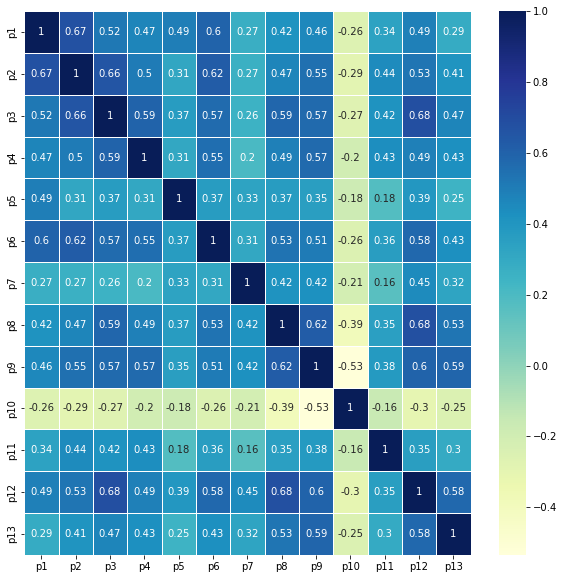

In [7]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(allScores.corr(), annot=True, cmap="YlGnBu", linewidths=.5, ax=ax)